<a href="https://colab.research.google.com/github/mateusribeirocampos/diollm/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Default title text
# prompt: could you help me run script to dele a folder full

import shutil
import os

def delete_folder(folder_path):
  """Deletes a folder and its contents.

  Args:
    folder_path: The path to the folder to delete.
  """
  try:
    if os.path.exists(folder_path):
      shutil.rmtree(folder_path)
      print(f"Folder '{folder_path}' and its contents deleted successfully.")
    else:
      print(f"Folder '{folder_path}' does not exist.")
  except OSError as e:
    print(f"Error deleting folder '{folder_path}': {e}")


# Example usage: replace with your folder path.
folder_to_delete = "/content/drive/MyDrive/Dataset_Animal"  # Example path. Change this.
delete_folder(folder_to_delete)


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import os

In [46]:
model = ResNet50(weights='imagenet')

In [47]:
img_path = '/content/drive/MyDrive/Dataset_Animal/'
print(img_path)

/content/drive/MyDrive/Dataset_Animal/


In [48]:
all_img = os.listdir(img_path)
print(all_img)

['tortuga.jpg', 'wolf.jpg', 'cow.jpg', 'elephant.jpg', 'giraffe.jpg', 'horse.jpg']


for img in all_img: Esta parte itera por cada item (presumivelmente nomes de arquivos de imagem) na lista all_img. all_img provavelmente contém nomes de arquivos obtidos da linha anterior: all_img = os.listdir(img_path)

os.path.join(img_path, img): Este é o núcleo da operação.
os.path.join é uma função que combina inteligentemente dois componentes de caminho (img_path e img) para criar um caminho de arquivo válido. Ela cuida do uso dos separadores de caminho corretos (como "/" ou "") para seu sistema operacional.

img_path é o caminho da pasta base onde suas imagens são armazenadas (por exemplo, '/content/drive/MyDrive/Dataset_Animal/').

img representa o nome do arquivo de imagem individual (por exemplo, 'cat.jpg', 'dog.png').

[...]: Os colchetes criam uma nova lista chamada all_path_img. Cada item nesta nova lista é o resultado de os.path.join(img_path, img) – um caminho completo para uma imagem.
print(all_path_img): Esta linha simplesmente imprime a lista all_path_img no console. Você verá uma lista de caminhos de arquivo completos para todas as imagens encontradas no diretório especificado.

In [ ]:
all_path_img = [os.path.join(img_path, img) for img in all_img]
print(all_path_img)

['/content/drive/MyDrive/Dataset_Animal/wolf.jpg', '/content/drive/MyDrive/Dataset_Animal/horse.jpg', '/content/drive/MyDrive/Dataset_Animal/tortuga.jpg', '/content/drive/MyDrive/Dataset_Animal/giraffe.jpg', '/content/drive/MyDrive/Dataset_Animal/elephant.jpg', '/content/drive/MyDrive/Dataset_Animal/cow.jpg']


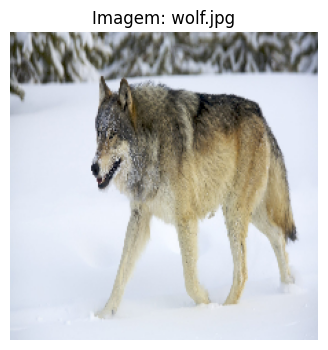

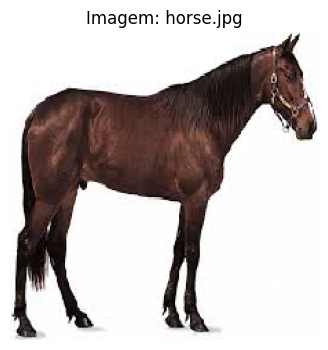

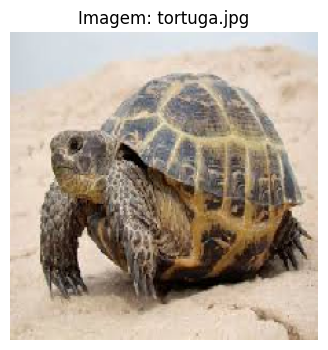

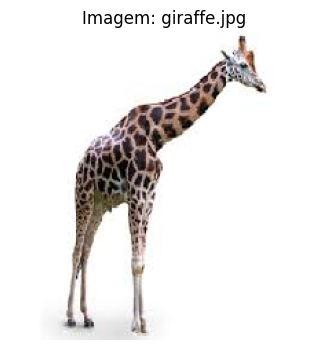

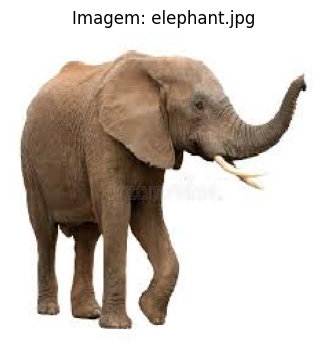

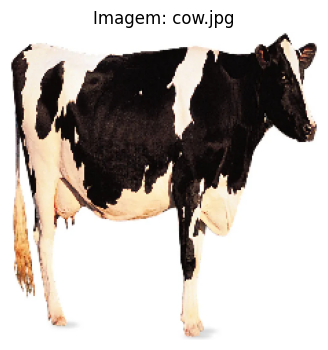

In [49]:
for img_path in all_path_img:
  img = keras.utils.load_img(img_path, target_size=(224,224))

  # Mostrar a imagem
  plt.figure(figsize=(4,4))
  plt.imshow(img)
  plt.axis('off')
  plt.title(f"Imagem: {os.path.basename(img_path)}")
  plt.show()

  x = keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

In [52]:
preds = model.predict(x)
print(f"Images path: {img_path}")
print("Predicted: ", decode_predictions(preds, top=3)[0])
print("---")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Images path: /content/drive/MyDrive/Dataset_Animal/cow.jpg
Predicted:  [('n02403003', 'ox', 0.91322476), ('n03868242', 'oxcart', 0.032948516), ('n02109047', 'Great_Dane', 0.026113784)]
---
